In [ ]:
import numpy as np
import random
import pandas as pd

#Hamed Sayed, hamed.sayed@sjsu.edu, 014974219
#Ikbal Singh Dhanjal,  ikbalsinghgurdevsingh.dhanjal@sjsu.edu, 017418804
class LogisticRegression:

    def __init__(self, rate = 0.01, iterations = 200):
        #/* Constructor initializes the rate and iterations. **/
        self.rate = rate
        self.iterations = iterations

    #sigmoid function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))  #σ(x)= 1/(1+e^(-x))

    #Helper function for prediction
    #Takes a test instance as input and outputs the probability of the label being 1
    #This function calls sigmoid
    def helper(self, x):
        temp = np.dot(x, self.weight)
        probability = self.sigmoid(temp)    #σ(x)= sigmoid(wx)
        return probability


    # Takes a test instance as input and outputs the predicted label
    # This function should call Helper function
    def predict(self, x):
        prediction = self.helper(x)
        if prediction < 0.5:
          return 0
        else:
          return 1    #PREDICTED CLASS = 1 iff Probability of class 1 ≥ 0.5

    # calculate log loss -> -1/m * sum [y log h + (1-y) log(1-h)]
    def compute_loss(self, X, y):
        predicted_values = np.apply_along_axis(lambda row: self.helper(row), axis=1, arr=X)
        log_loss = (-1 / X.shape[0] )* np.sum((y * np.log(predicted_values)) + ((1-y) * np.log(1-predicted_values)))
        return log_loss

    #Train the Logistic Regression in a function using Stochastic Gradient Descent
    #Also compute the log-oss in this function using matplot
    def train(self, X, y):

        losses = [self.compute_loss(X, y)]
        for i in range(self.iterations):
            m = X.shape[0]

            # weight updates using stochastic gradient descent -> w = w - (alpha * (h-y) * x[i])
            for j in range(m):
                row_vector = X[j]
                pred = self.helper(row_vector)
                error = pred - y[j]
                self.weight = self.weight - (self.rate * error * row_vector[:, np.newaxis])

            losses.append(self.compute_loss(X,y))

        return self.weight, losses


    #This function takes a test set as input, call the predict function to predict a label for it, and prints the accuracy, Precision, Recall,
    #and F1 score of the positive class and negative class and the confusion matrix
    def test(self, X_test, y_test):
        # X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add a column of ones (bias term)
        y_pred = [self.predict(x) for x in X_test]

        # Count true positives, false positives, false negatives, and true negatives
        FP = sum((y_pred[i] == 1) and (y_test[i] == 0) for i in range(len(y_pred)))
        FN = sum((y_pred[i] == 0) and (y_test[i] == 1) for i in range(len(y_pred)))
        TP = sum((y_pred[i] == 1) and (y_test[i] == 1) for i in range(len(y_pred)))
        TN = sum((y_pred[i] == 0) and (y_test[i] == 0) for i in range(len(y_pred)))

        # Calculate accuracy, precision, and recall
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)

        neg_precision = TN / (TN + FN)
        neg_recall = TN / (TN + FP)

        # Calculate the F1 score for positive and negative classes
        f1_positive = (2 * precision * recall)/ (precision + recall)
        f1_negative = (2 * (TN / (TN + FN)) * (TN / (TN + FP))) / ((TN / (TN + FN)) + (TN / (TN + FP))) #opposite of f1 positive

        print("Accuracy: " + str(accuracy))
        print("Precision (Positive class): " + str(precision))
        print("Recall (Positive class): " + str(recall))
        print("Precision (Negative class): " + str(neg_precision))
        print("Recall (Negative class): " + str(neg_recall))
        print("F1 Score (Positive Class): " + str(f1_positive))
        print("F1 Score (Negative Class): " + str(f1_negative))

        # Print the confusion matrix
        print("Confusion Matrix:")
        print("True Negative (TN):", TN)
        print("False Positive (FP):", FP)
        print("False Negative (FN):", FN)
        print("True Positive (TP):", TP)


    def read_dataset(self, filename):
        #read data set function
        df = pd.read_csv(filename)

        df_features = df.loc[:, df.columns != 'label']
        df_label = df.loc[:, df.columns == 'label']

        X  = np.array(df_features)
        y = np.array(df_label)

        self.weight = np.zeros((X.shape[1], 1))
        return X,y

    def read_test_data_set(self, filename):
        #read data set function
        df = pd.read_csv(filename)

        df_features = df.loc[:, df.columns != 'label']
        df_label = df.loc[:, df.columns == 'label']

        X  = np.array(df_features)
        y = np.array(df_label)

        return X,y

In [ ]:
log_regression_classifier = LogisticRegression(0.01, 200)
X_train,y_train = log_regression_classifier.read_dataset('train-1.csv')

In [ ]:
weights, losses = log_regression_classifier.train(X=X_train, y=y_train)

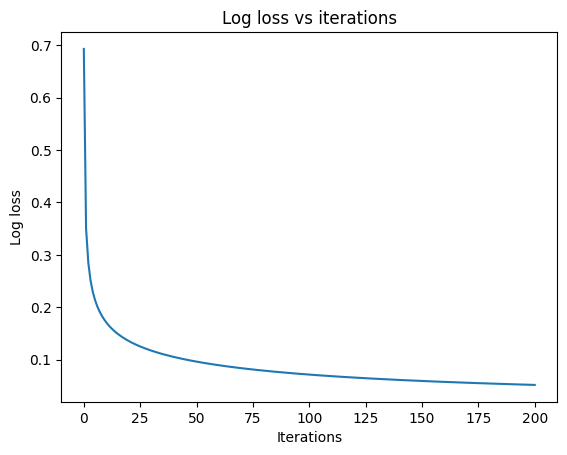

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Log loss vs iterations")
plt.xlabel("Iterations")
plt.ylabel("Log loss")

plt.show()

In [ ]:
X_test,y_test = log_regression_classifier.read_test_data_set('test-1.csv')
print("---  Train set ---")
log_regression_classifier.test(X_train, y_train)
print("\n", "---  Test set ---")
log_regression_classifier.test(X_test, y_test)

---  Train set ---
Accuracy: [0.98183449]
Precision (Positive class): [0.89026275]
Recall (Positive class): [0.98293515]
Precision (Negative class): [0.99737671]
Recall (Negative class): [0.98166796]
F1 Score (Positive Class): [0.93430657]
F1 Score (Negative Class): [0.98945999]
Confusion Matrix:
True Negative (TN): [3802]
False Positive (FP): [71]
False Negative (FN): [10]
True Positive (TP): [576]

 ---  Test set ---
Accuracy: [0.95605381]
Precision (Positive class): [0.81111111]
Recall (Positive class): [0.9068323]
Precision (Negative class): [0.98395722]
Recall (Negative class): [0.96436059]
F1 Score (Positive Class): [0.85630499]
F1 Score (Negative Class): [0.97406035]
Confusion Matrix:
True Negative (TN): [920]
False Positive (FP): [34]
False Negative (FN): [15]
True Positive (TP): [146]
